<a href="https://colab.research.google.com/github/abuy-corn/Data_Analysis/blob/main/Apple_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I am going to analyze for Apple's stock (AAPL).
The goal of this analysis is to evaluate wether AAPL is bullish or bearish at particular time.
This analysis is useful for those who want to learn tehcinical analysis to invest at a stock market.
As a first step, we should download stock data from AAPL using yfinance library.

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
def download_stock_data(ticker, start, end):
    return yf.download(ticker, start=start, end=end)

In [ ]:
# Download stock data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2024-06-01', end='2024-08-01')

# Preview the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-03  192.899994  194.990005  192.520004  194.029999  193.805664   
2024-06-04  194.639999  195.320007  193.029999  194.350006  194.125305   
2024-06-05  195.399994  196.899994  194.869995  195.869995  195.643539   
2024-06-06  195.690002  196.500000  194.169998  194.479996  194.255142   
2024-06-07  194.649994  196.940002  194.139999  196.889999  196.662369   

              Volume  
Date                  
2024-06-03  50080500  
2024-06-04  47471400  
2024-06-05  54156800  
2024-06-06  41181800  
2024-06-07  53103900  


Next step we are going to calculate Moving Average Convergence Divergence (MACD) which can help  investors identify market entry points.

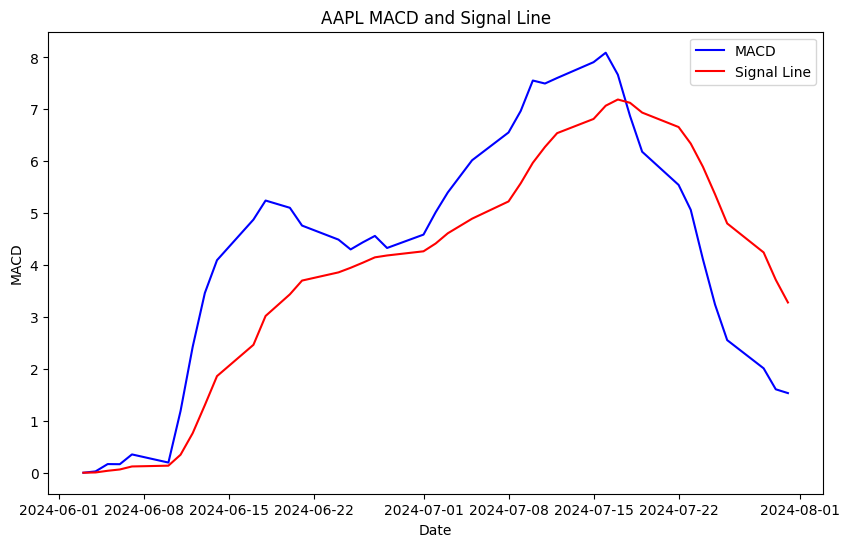

In [ ]:
# Calculate MACD and Signal Line
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


Before we analyze the graph, lets calculate Simple Moving Average as well. We use 20 days for shorter term trade.

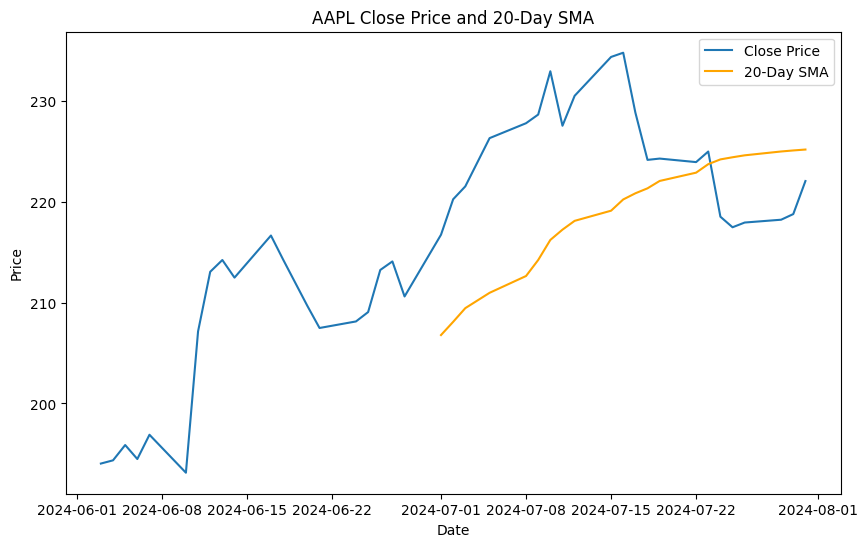

In [ ]:
# Calculate 20-day SMA
data['SMA20'] = data['Close'].rolling(window=20).mean()

# Plotting the closing price and SMA
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='20-Day SMA', color='orange')
plt.title('AAPL Close Price and 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Next, we also going to calculate relative strength index (RSI).
The graph shows that there is a big jump and down between periode from 65 to 80 and go just below 30. There is a very fast momentum change here

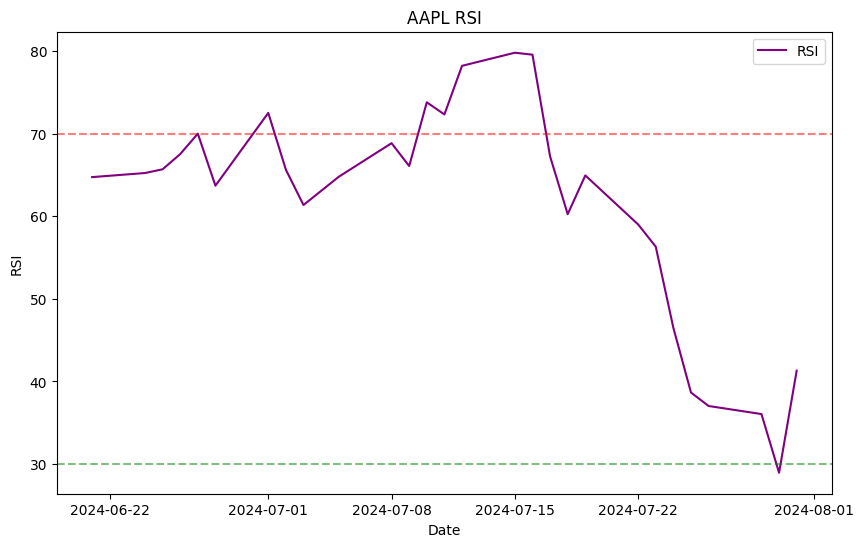

In [ ]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Plotting RSI
plt.figure(figsize=(10, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('AAPL RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


From the graph we can see that MACD keep above the signal line until around mid July which means it is sign for a bullish!
On the other hand AAPL's price until is keep above 20 days SMA line until final week of July which indicating a downward trend.

**Divergence:** There might be a divergence between the price and the momentum indicators. This could suggest a weakening trend or a potential reversal.
<br>**Market Uncertainty**: The market might be experiencing a period of indecision, with bullish and bearish forces in equilibrium.
<br>**Lagging Indicators**: The 20-day SMA is a relatively short-term indicator, and it's possible it's lagging behind the price movement.

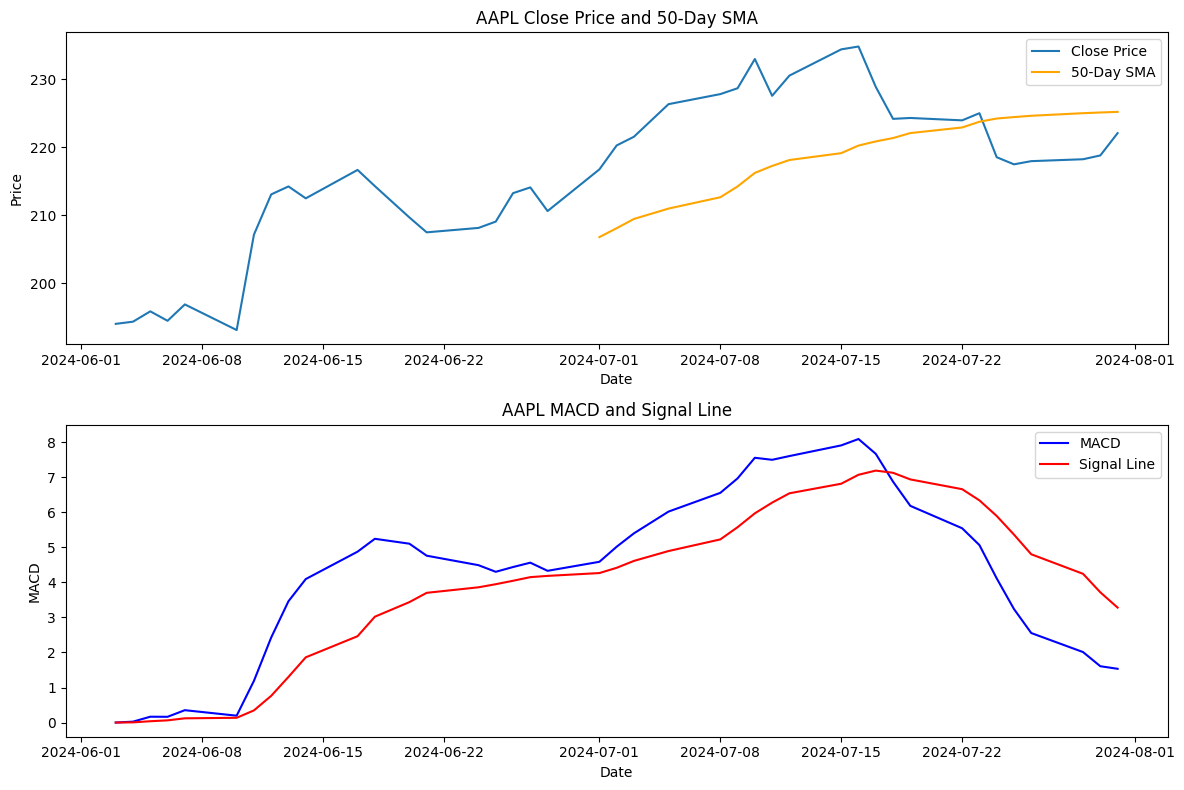

In [ ]:
# Plot closing price with SMA and MACD
plt.figure(figsize=(12, 8))

# Subplot 1: Close Price and SMA
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', color='orange')
plt.title('AAPL Close Price and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: MACD and Signal Line
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Downloading financial statements using yfinance
apple = yf.Ticker(ticker)

# Income Statement
income_statement = apple.financials
income_statement = income_statement.T

income_statement.to_csv('income_statement.csv', index=False, float_format='%.2f')

print(income_statement)
# Balance Sheet
balance_sheet = apple.balance_sheet
print(balance_sheet)

# Cash Flow Statement
cash_flow = apple.cashflow
print(cash_flow)

# Example: Calculate P/E ratio
pe_ratio = apple.info['trailingPE']
print(f"P/E Ratio: {pe_ratio}")


           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2023-09-30                         0.0              0.147    129188000000.0   
2022-09-30                         0.0              0.162    133138000000.0   
2021-09-30                         0.0              0.133    123136000000.0   
2020-09-30                         0.0              0.144     81020000000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2023-09-30                                      96995000000.0           
2022-09-30                                      99803000000.0           
2021-09-30                                      94680000000.0           
2020-09-30                                      57411000000.0           

           Reconciled Depreciation Reconciled Cost Of Revenue          EBITDA  \
2023-09-30           11519000000.0             214137000000.0  129188000000.0   
2022-09-30           11104000000.0             223546000000.0  133138000000.

In [ ]:
# Example data (based on provided values)
gross_profit = 169148000000.0
total_revenue = 383285000000.0
operating_income = 114301000000.0
net_income = 96995000000.0

print(f"AAPL")
# Gross Profit Margin
gross_profit_margin = (gross_profit / total_revenue) * 100
print(f"Gross Profit Margin: {gross_profit_margin:.2f}%")

# Operating Profit Margin
operating_profit_margin = (operating_income / total_revenue) * 100
print(f"Operating Profit Margin: {operating_profit_margin:.2f}%")

# Net Profit Margin
net_profit_margin = (net_income / total_revenue) * 100
print(f"Net Profit Margin: {net_profit_margin:.2f}%")

AAPL
Gross Profit Margin: 44.13%
Operating Profit Margin: 29.82%
Net Profit Margin: 25.31%
